<a href="https://colab.research.google.com/github/mahak-dev/AISKCON-CONSTRUCTION/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
try:
    import os

    import pandas as  pd
    import spacy

    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob

    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re


    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline


    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer


    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [86]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [87]:
df = pd.read_csv("test.csv")

<Axes: >

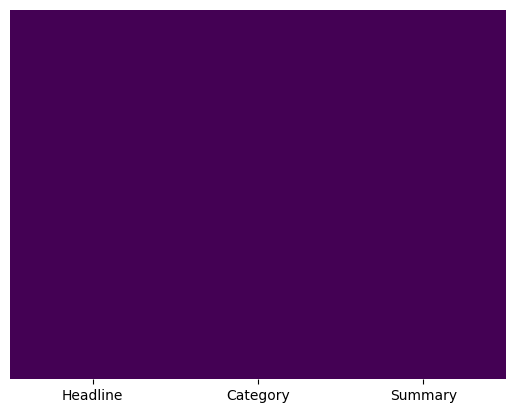

In [88]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

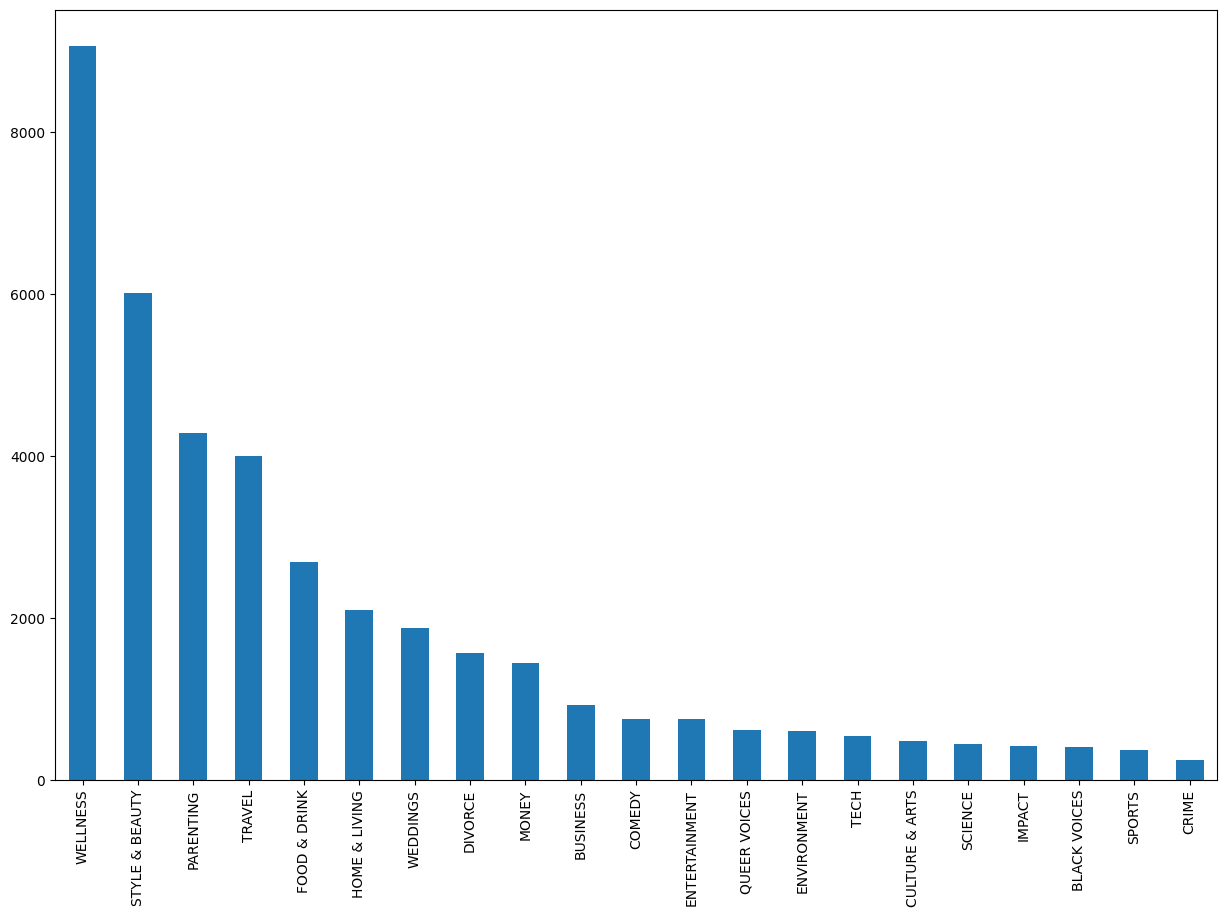

In [89]:
df['Category'].value_counts().plot( kind='bar', figsize=(15,10))

In [90]:
df.columns

Index(['Headline', 'Category', 'Summary'], dtype='object')

In [91]:
df.describe()

,Headline,Category,Summary
count,39527,39527,39444
unique,38764,21,38862
top,Watch The Top 9 YouTube Videos Of The Week,WELLNESS,If you're looking to see the most popular YouT...
freq,46,9060,46


In [92]:
df.isna().sum()

Headline     0
Category     0
Summary     83
dtype: int64

In [93]:
df.head(2)

,Headline,Category,Summary
0,Biographer Elizabeth Winder on Sylvia Plath's ...,WELLNESS,"Ever since I read The Bell Jar, Sylvia Plath's..."
1,The Road Rage Warrior,WELLNESS,It's not easy driving in traffic with people c...


In [94]:
df['Category'].unique()

array(['WELLNESS', 'FOOD & DRINK', 'STYLE & BEAUTY', 'WEDDINGS',
       'DIVORCE', 'PARENTING', 'HOME & LIVING', 'TRAVEL', 'CRIME',
       'BLACK VOICES', 'SCIENCE', 'COMEDY', 'IMPACT', 'BUSINESS', 'TECH',
       'ENTERTAINMENT', 'ENVIRONMENT', 'CULTURE & ARTS', 'QUEER VOICES',
       'SPORTS', 'MONEY'], dtype=object)

In [95]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw

def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [98]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

In [20]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=d23199ee5e4160036da04167c3fcd9890db35f8db9da91e36e430faa4f75a14d
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [99]:
import swifter

In [101]:
print(df['text'].dtype)

object


In [102]:
df['text'] = df['text'].astype(str)

In [104]:
def clean_txt(text):
    # ...
    text = str(text)
    text = re.sub("'", "", text)
    # ...

In [105]:
df['text'] = df['Headline']  +  " " + df['Summary']
df['text'] = df['text'].apply(lambda x : str(x))

df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))

Pandas Apply:   0%|          | 0/39527 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39527 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/39527 [00:00<?, ?it/s]

In [106]:
X = df[['text', 'polarity', 'subjectivity','len']]
y =df['Category']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
v = dict(zip(list(y), df['Category'].to_list()))

In [24]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [107]:
text_clf.fit(x_train['text'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [108]:
import numpy as np

In [109]:
X_TEST = x_test['text'].to_list()
Y_TEST = list(y_test)

In [110]:
predicted = text_clf.predict(X_TEST)

In [111]:
c = 0

for doc, category in zip(X_TEST, predicted):

    if c == 2:break

    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    c = c + 1

-------------------------------------------------------
McDonald's Adds Calorie Counts To Menus: But Will It Work? The researchers evaluated New York City patrons before and after calorie counts were made mandatory and then looked at a
WELLNESS
-------------------------------------------------------
-------------------------------------------------------
How To Find Love At A Fall Wedding Fall wedding season is in full swing; whether you're a guest or have bridesmaid responsibilities, you're going to want to make sure you're prepared to maximize your opportunities as a single.
WEDDINGS
-------------------------------------------------------


In [112]:
np.mean(predicted == Y_TEST)

0.7098406273716165

In [113]:
docs_new = ["He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."]

In [114]:
predicted = text_clf.predict(docs_new)

In [115]:
v[predicted[0]]

'TRAVEL'

In [118]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(text_clf,f)

In [117]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [119]:
df2 = pd.read_csv('test.csv')

In [120]:
df2.dropna(inplace = True)

In [121]:
docs_new = df2['Summary']
predicted = clf2.predict(docs_new)

In [122]:
docs_new = ["He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles."]
predicted = clf2.predict(docs_new)

In [123]:
v[predicted[0]]

'TRAVEL'

In [124]:
import pickle

In [125]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [126]:
ddf = pd.read_csv('test.csv')
ddf.dropna(inplace = True)

In [127]:
test_data = ddf['Summary']

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [129]:
predictions = clf2.predict(test_data)

In [130]:
print(predictions)

[20 20 20 ... 20 15 15]


In [82]:
np.mean(predictions == Y_TEST)

<ipython-input-82-95002fc3baff>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.mean(predictions == Y_TEST)


0.0

In [84]:
# Evaluate the best model
accuracy_best = np.mean(predictions == Y_TEST)
print(f"Improved Accuracy on the test set: {accuracy_best}")

Improved Accuracy on the test set: 0.0


<ipython-input-84-9fb6f73e72de>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy_best = np.mean(predictions == Y_TEST)
